## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,Spain,Brazil,France,Italy,Belgium,Mexico,Germany,Netherlands,Sweden,Russia,Peru,Turkey,Canada,Iran
4/27/20,1378,338,331,317,437,333,113,83,150,43,80,47,54,95,63,96
4/28/20,2096,909,301,480,367,382,124,135,188,48,81,73,72,92,49,71
4/29/20,2612,795,453,430,427,323,170,163,153,145,107,105,89,89,81,80


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2034.222222
United Kingdom     782.888889
France             424.666667
Italy              396.444444
Spain              380.333333
Brazil             325.111111
Belgium            185.888889
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 66.8 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 13.2 MB/s eta 0:00:01    |████████                        | 6.6 MB 13.2 MB/s eta 0:00:02
     |████████████████████████████████| 88 kB 8.4 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 6.0 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1651      0 --:--:-- --:--:-- --:--:--  1664
100 66458  100 66458    0     0   279k      0 --:--:-- --:--:-- --:--:--  279k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
Country/Region,,,,,,,,,,,,,
US,37411,39753,40945,42659,45086,47412,49724,51493,53755,54881,56259,58355,60967
Italy,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359,27682
United Kingdom,16879,17994,18492,19051,20223,21060,21787,22792,23635,24055,24393,25302,26097
Spain,20002,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822,24275
France,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660,24087
Belgium,5163,5453,5683,5828,5998,6262,6490,6679,6917,7094,7207,7331,7501
Germany,4352,4459,4586,4862,5033,5279,5575,5760,5877,5976,6126,6314,6467
Iran,4958,5031,5118,5209,5297,5391,5481,5574,5650,5710,5806,5877,5957
Brazil,2141,2354,2462,2587,2741,2906,3331,3704,4057,4286,4603,5083,5513


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
Country/Region,,,,,,,,,,,,
US,2342,1192,1714,2427,2326,2312,1769,2262,1126,1378,2096,2612
United Kingdom,1115,498,559,1172,837,727,1005,843,420,338,909,795
Spain,41,410,399,430,435,440,367,378,288,331,301,453
Brazil,213,108,125,154,165,425,373,353,229,317,480,430
France,642,395,547,531,544,516,389,369,242,437,367,427
Italy,482,433,454,534,437,464,420,415,260,333,382,323
Belgium,290,230,145,170,264,228,189,238,177,113,124,170
Mexico,104,36,26,145,113,99,152,84,46,83,135,163
Germany,107,127,276,171,246,296,185,117,99,150,188,153


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2342,1192,1714,2427,2326,2312,1769,2262,1126,1378,2096,2612"
data-datasets="1115,498,559,1172,837,727,1005,843,420,338,909,795"
data-datasets="41,410,399,430,435,440,367,378,288,331,301,453"
data-datasets="213,108,125,154,165,425,373,353,229,317,480,430"
data-datasets="642,395,547,531,544,516,389,369,242,437,367,427"
data-datasets="482,433,454,534,437,464,420,415,260,333,382,323"
data-datasets="290,230,145,170,264,228,189,238,177,113,124,170"
data-datasets="104,36,26,145,113,99,152,84,46,83,135,163"
data-datasets="107,127,276,171,246,296,185,117,99,150,188,153"
data-datasets="142,83,67,165,138,123,112,120,66,43,48,145"
data-datasets="111,29,40,185,172,84,131,40,2,80,81,107"
data-datasets="40,48,44,51,57,42,60,66,66,47,73,105"
data-datasets="48,52,45,39,46,42,62,66,28,54,72,89"
data-datasets="121,127,123,119,117,115,109,106,99,95,92,89"
data-datasets="40,27,33,70,68,44,56,54,44,63,49,81"
data-datasets="73,

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Canada,Chile,...,Saudi Arabia,Serbia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/26/20,6,7,6,5,177,229,0,44,70,8,...,3,0,1,288,2,11,99,8,420,1126
4/27/20,7,5,7,7,113,317,4,63,84,9,...,5,0,3,331,80,55,95,11,338,1378
4/28/20,5,10,20,3,124,480,2,49,83,9,...,8,0,3,301,81,34,92,19,909,2096
4/29/20,7,7,11,8,170,430,3,81,79,9,...,5,0,10,453,107,17,89,11,795,2612


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1895.571429
United Kingdom     725.571429
France             409.142857
Italy              387.285714
Spain              362.857143
Brazil             334.571429
Belgium            190.428571
dtype: float64

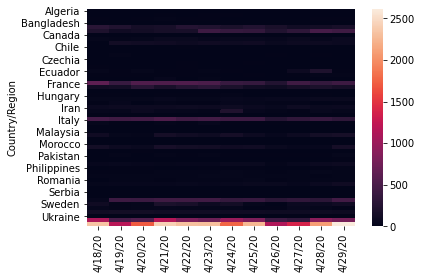

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

54 12.416666666666666


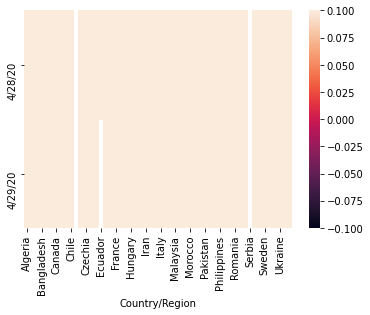

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/29/20
Country/Region,
South Africa,2.156863
Panama,1.951613
Philippines,1.913043
Russia,1.752656
Pakistan,1.705000
Mexico,1.657116
Peru,1.645378
Moldova,1.629630
Canada,1.512733


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 6.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=49e9f7e377a5e853cd3ae785af7cd1f3b8bb52706d008364d14a724d2b42c8d6
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
